In [751]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [752]:
train = pd.read_csv(r'E:\backup2\Data science\projects_data_science\titanic\train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [753]:
test = pd.read_csv(r'E:\backup2\Data science\projects_data_science\titanic\test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [754]:
train.shape

(891, 12)

In [755]:
len(set(train.Sex))

2

In [756]:
import seaborn as sns
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

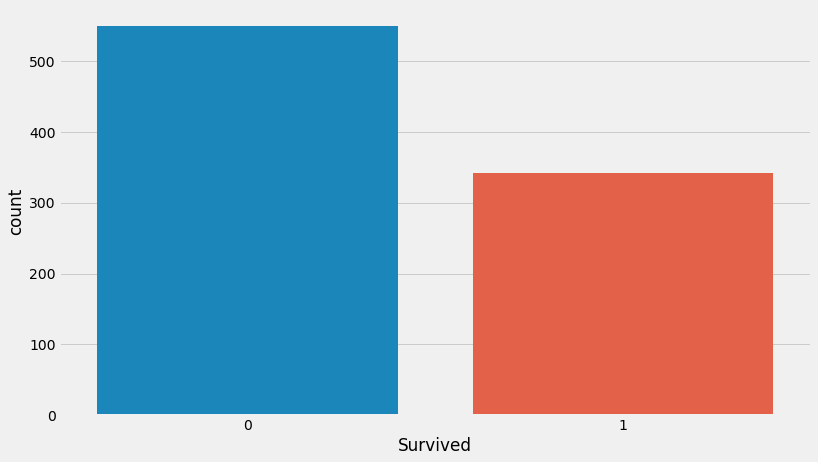

In [757]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,7))
sns.countplot(train.Survived)
plt.show()

In [758]:
print ("Skew is:", train.Survived.skew())

Skew is: 0.4785234382949897


In [759]:
feature_number = train.select_dtypes(include = [np.number])
feature_number.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [760]:
correlation = feature_number.corr()
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [761]:
(set(train.Parch))

{0, 1, 2, 3, 4, 5, 6}

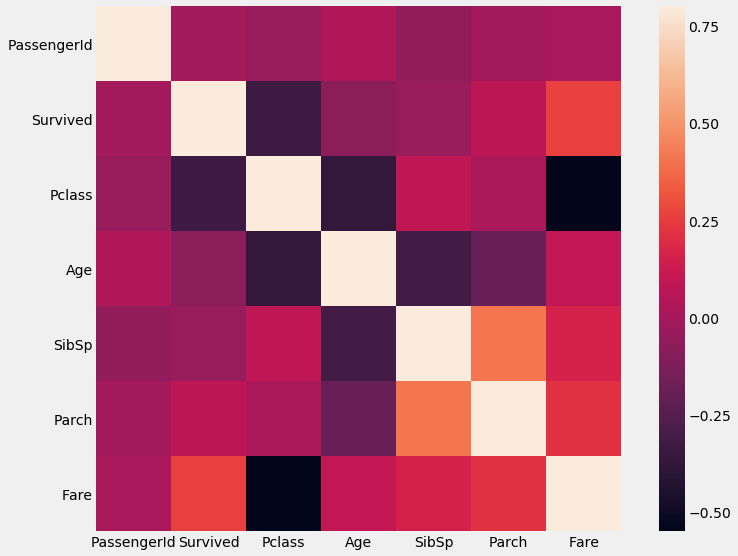

In [762]:
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(correlation, vmax = 0.8, square = True)

In [763]:
train['source'] = 'train'
train['source'] = 'test'

data = pd.concat([train, test], ignore_index = True, sort = False)
print(train.shape, test.shape, data.shape)


data['Sex'] = data['Sex'].replace(to_replace=['male', 'female'], value=[1, 0])
data.head()

(891, 13) (418, 11) (1309, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,test
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,test
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,test
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,test
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,test


In [764]:
value2 = data['Age'].median(skipna = True) 
data['Age'] = data['Age'].fillna(value2)

def process_age():
    
    data['Young'] = data['Age'].map(lambda d: 1 if d<=10.0 else 0)
    data['MiddleAged'] = data['Age'].map(lambda d: 1 if d>10.0 and d<40.0 else 0)
    data['Old'] = data['Age'].map(lambda d: 1 if d>=40.0 else 0)
    data.drop(['Age'], axis=1, inplace=True)
    
    
process_age()

In [765]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,Young,MiddleAged,Old
0,1,0.0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,S,test,0,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,C,test,0,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,S,test,0,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,S,test,0,1,0
4,5,0.0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,S,test,0,1,0


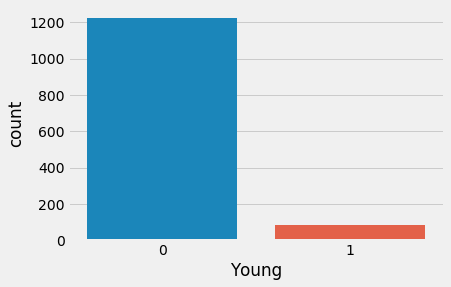

In [766]:
sns.countplot(data.Young)

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Young          0.120075
MiddleAged    -0.062861
Old           -0.009346
Name: Survived, dtype: float64


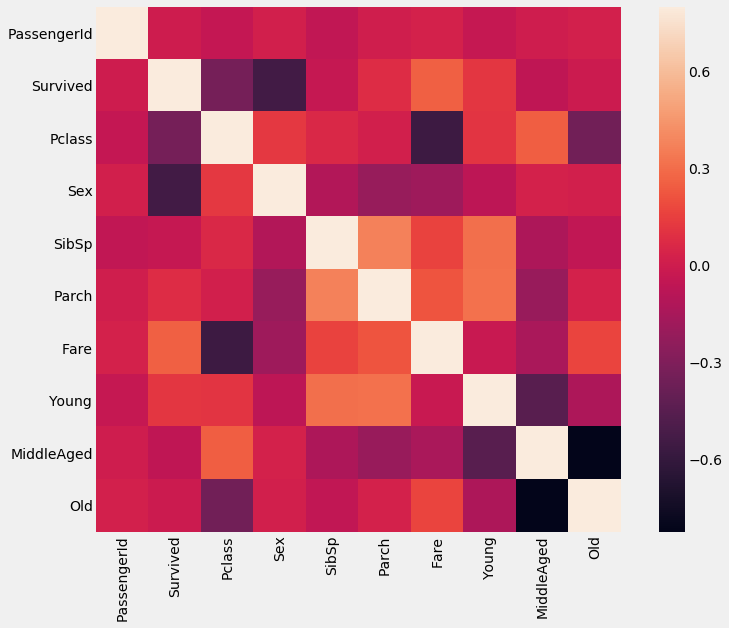

In [767]:
feature_number = data.select_dtypes(include = [np.number])
feature_number.dtypes
correlation = feature_number.corr()
print(correlation['Survived'])
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(correlation, vmax = 0.8, square = True)

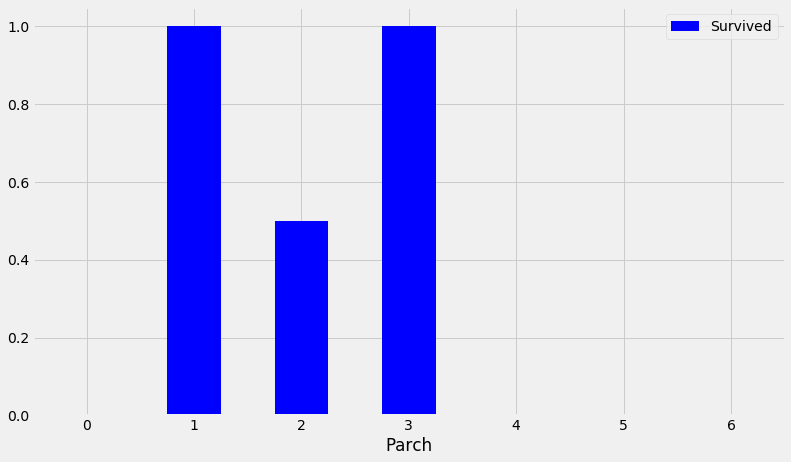

{0, 1, 2, 3, 4, 5, 6}

In [768]:
Parch_ptable = \
data.pivot_table(index='Parch', values="Survived", aggfunc=np.median)
Parch_ptable.plot(kind='bar', color='blue',figsize=(12,7))

plt.xticks(rotation=0)
plt.show()
(set(train.Parch))

In [769]:
def process_parent_child_ratio():
    
    data['Less_Parents'] = data['Parch'].map(lambda d: 1 if d>=0 and d<2 else 0)
    data['Middle_ranged_ratio'] = data['Parch'].map(lambda d: 1 if d>=2 and d<4 else 0)
    data['High_parent_ratio'] = data['Parch'].map(lambda d: 1 if d>=4 and d<=6 else 0)
    data.drop(['Parch'], axis=1, inplace=True)
    
    
process_parent_child_ratio()

In [770]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Ticket,Fare,Cabin,Embarked,source,Young,MiddleAged,Old,Less_Parents,Middle_ranged_ratio,High_parent_ratio
0,1,0.0,3,"Braund, Mr. Owen Harris",1,1,A/5 21171,7.2500,NaN,S,test,0,1,0,1,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,PC 17599,71.2833,C85,C,test,0,1,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,S,test,0,1,0,1,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,113803,53.1000,C123,S,test,0,1,0,1,0,0
4,5,0.0,3,"Allen, Mr. William Henry",1,0,373450,8.0500,NaN,S,test,0,1,0,1,0,0


PassengerId           -0.005007
Survived               1.000000
Pclass                -0.338481
Sex                   -0.543351
SibSp                 -0.035322
Fare                   0.257307
Young                  0.120075
MiddleAged            -0.062861
Old                   -0.009346
Less_Parents          -0.056346
Middle_ranged_ratio    0.081496
High_parent_ratio     -0.062182
Name: Survived, dtype: float64


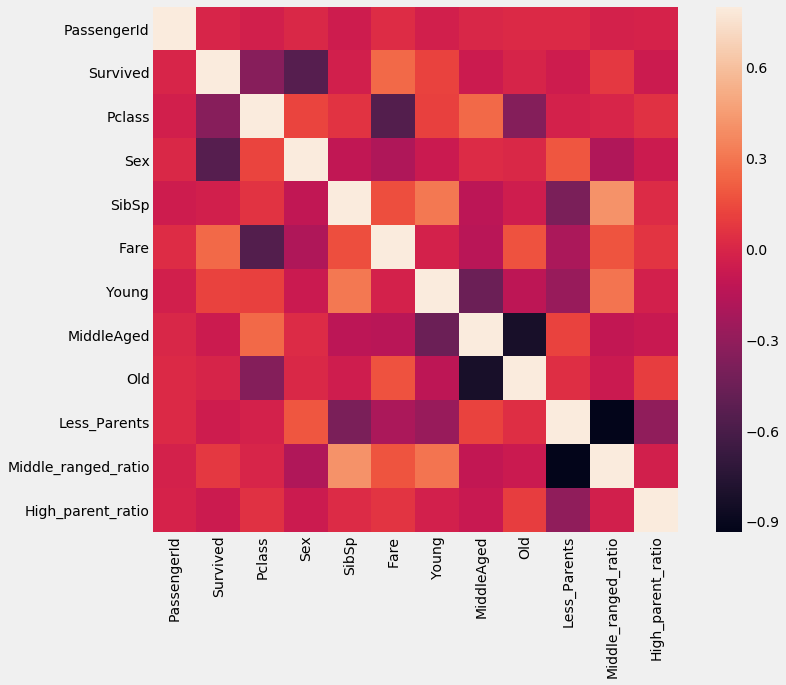

In [771]:
feature_number = data.select_dtypes(include = [np.number])
feature_number.dtypes
correlation = feature_number.corr()
print(correlation['Survived'])
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(correlation, vmax = 0.8, square = True)

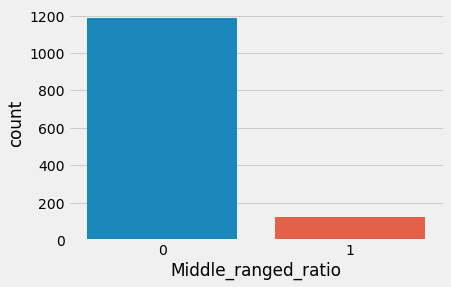

In [772]:
sns.countplot(data.Middle_ranged_ratio)

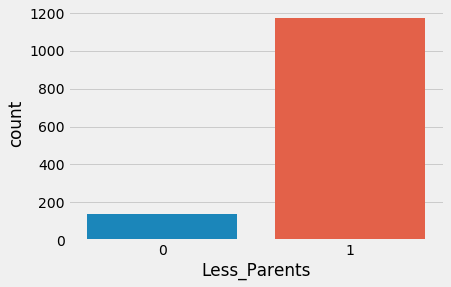

In [773]:
sns.countplot(data.Less_Parents)

In [774]:
len(set(data.Cabin))

187

In [775]:
data['Cabin'] = data['Cabin'].fillna(0)

In [776]:
data['Cabin'] = data['Cabin'].map(lambda d: 0 if d==0 else 1)

In [777]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Ticket,Fare,Cabin,Embarked,source,Young,MiddleAged,Old,Less_Parents,Middle_ranged_ratio,High_parent_ratio
0,1,0.0,3,"Braund, Mr. Owen Harris",1,1,A/5 21171,7.2500,0,S,test,0,1,0,1,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,PC 17599,71.2833,1,C,test,0,1,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0,S,test,0,1,0,1,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,113803,53.1000,1,S,test,0,1,0,1,0,0
4,5,0.0,3,"Allen, Mr. William Henry",1,0,373450,8.0500,0,S,test,0,1,0,1,0,0


                     PassengerId  Survived    Pclass       Sex     SibSp  \
PassengerId             1.000000 -0.005007 -0.038354  0.013406 -0.055224   
Survived               -0.005007  1.000000 -0.338481 -0.543351 -0.035322   
Pclass                 -0.038354 -0.338481  1.000000  0.124617  0.060832   
Sex                     0.013406 -0.543351  0.124617  1.000000 -0.109609   
SibSp                  -0.055224 -0.035322  0.060832 -0.109609  1.000000   
Fare                    0.031428  0.257307 -0.558629 -0.185523  0.160238   
Cabin                  -0.000208  0.316912 -0.713857 -0.137396 -0.009064   
Young                  -0.034109  0.120075  0.112807 -0.066872  0.308264   
MiddleAged              0.002047 -0.062861  0.253100  0.026301 -0.128080   
Old                     0.019385 -0.009346 -0.353702  0.013168 -0.053080   
Less_Parents            0.019344 -0.056346 -0.019670  0.188824 -0.397033   
Middle_ranged_ratio    -0.023822  0.081496 -0.002144 -0.175855  0.409435   
High_parent_

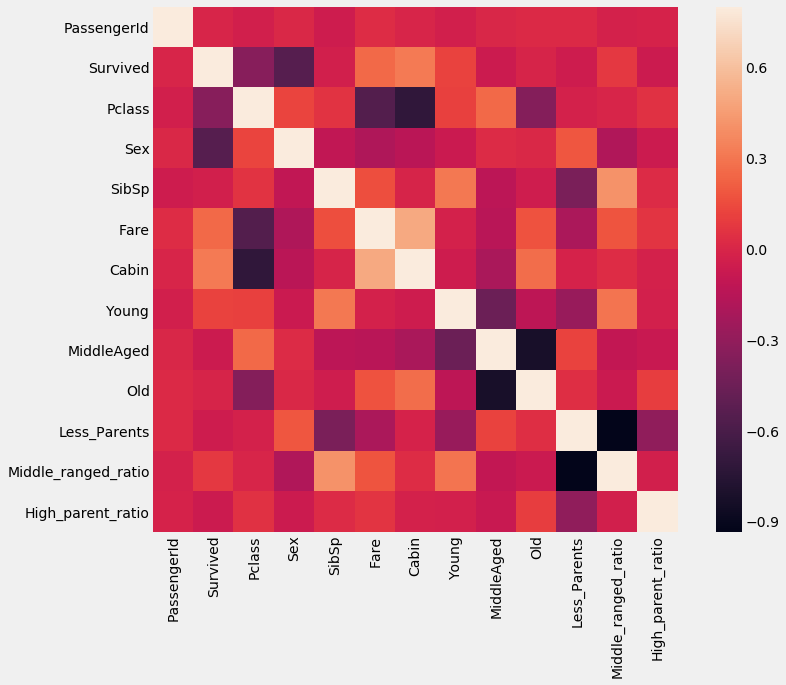

In [778]:
feature_number = data.select_dtypes(include = [np.number])
feature_number.dtypes
correlation = feature_number.corr()
print(correlation)
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(correlation, vmax = 0.8, square = True)

In [779]:
(set(train.SibSp))
train.SibSp.isna().any()

False

In [780]:
def process_sibling_spouse_ratio():
    
    data['Equalled_sibling_spouse_ratio'] = data['SibSp'].map(lambda d: 1 if d>=0 and d<2 else 0)
    data['Middle_sibling_ratio'] = data['SibSp'].map(lambda d: 1 if d>=2 and d<4 else 0)
    data['High_sibling_ratio'] = data['SibSp'].map(lambda d: 1 if d>=4 and d<=6 else 0)
    data.drop(['SibSp'], axis=1, inplace=True)
    
    
process_sibling_spouse_ratio()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Fare,Cabin,Embarked,source,Young,MiddleAged,Old,Less_Parents,Middle_ranged_ratio,High_parent_ratio,Equalled_sibling_spouse_ratio,Middle_sibling_ratio,High_sibling_ratio
0,1,0.0,3,"Braund, Mr. Owen Harris",1,A/5 21171,7.2500,0,S,test,0,1,0,1,0,0,1,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,PC 17599,71.2833,1,C,test,0,1,0,1,0,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,STON/O2. 3101282,7.9250,0,S,test,0,1,0,1,0,0,1,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,113803,53.1000,1,S,test,0,1,0,1,0,0,1,0,0
4,5,0.0,3,"Allen, Mr. William Henry",1,373450,8.0500,0,S,test,0,1,0,1,0,0,1,0,0


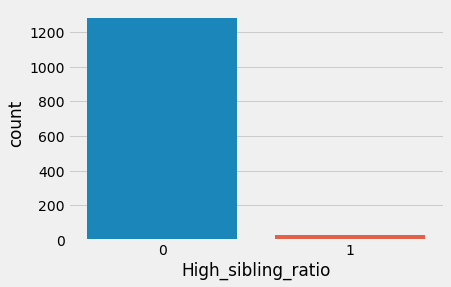

In [781]:
sns.countplot(data.High_sibling_ratio)

PassengerId                     -0.005007
Survived                         1.000000
Pclass                          -0.338481
Sex                             -0.543351
Fare                             0.257307
Cabin                            0.316912
Young                            0.120075
MiddleAged                      -0.062861
Old                             -0.009346
Less_Parents                    -0.056346
Middle_ranged_ratio              0.081496
High_parent_ratio               -0.062182
Equalled_sibling_spouse_ratio    0.070281
Middle_sibling_ratio             0.001183
High_sibling_ratio              -0.084819
Name: Survived, dtype: float64


(1309, 19)

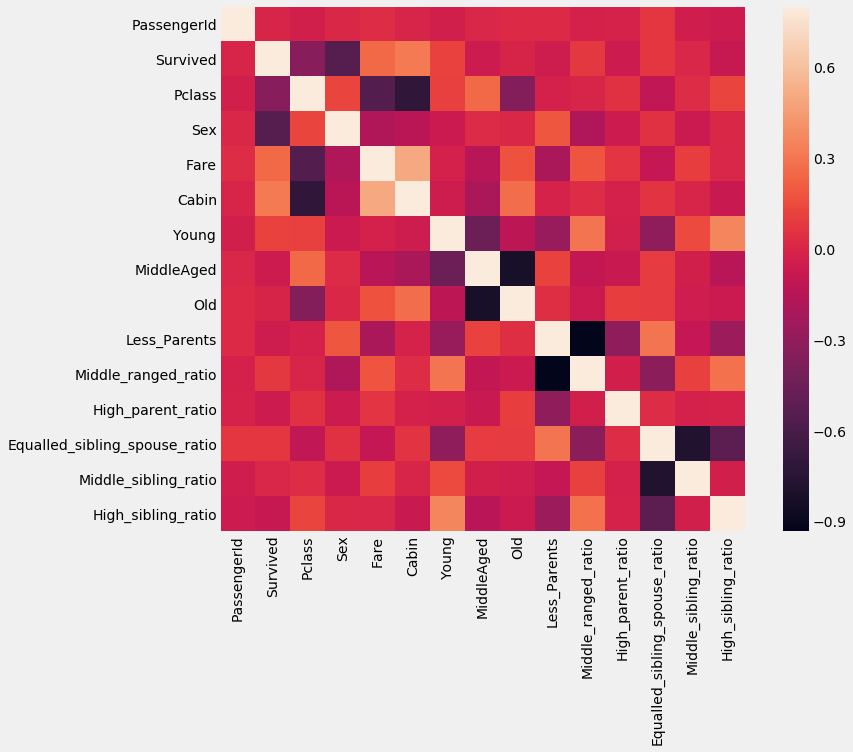

In [782]:
feature_number = data.select_dtypes(include = [np.number])
feature_number.dtypes
correlation = feature_number.corr()
print(correlation['Survived'])
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(correlation, vmax = 0.8, square = True)
data.shape

In [783]:

train = data[:891]
test = data[891:]

In [784]:
train.shape

(891, 19)

In [785]:
test.shape

(418, 19)

In [786]:
train['Survived'].isna().any()

False

In [787]:
train.drop(['source'], axis = 1, inplace = True)
test.drop(['source'], axis = 1, inplace = True)

C:\Users\vivek\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [788]:
print(train.shape)
test.shape

(891, 18)


(418, 18)

In [789]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Fare,Cabin,Embarked,Young,MiddleAged,Old,Less_Parents,Middle_ranged_ratio,High_parent_ratio,Equalled_sibling_spouse_ratio,Middle_sibling_ratio,High_sibling_ratio
0,1,0.0,3,"Braund, Mr. Owen Harris",1,A/5 21171,7.2500,0,S,0,1,0,1,0,0,1,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,PC 17599,71.2833,1,C,0,1,0,1,0,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,STON/O2. 3101282,7.9250,0,S,0,1,0,1,0,0,1,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,113803,53.1000,1,S,0,1,0,1,0,0,1,0,0
4,5,0.0,3,"Allen, Mr. William Henry",1,373450,8.0500,0,S,0,1,0,1,0,0,1,0,0


In [790]:
test.head()
test.drop(['Survived'], axis = 1, inplace = True)

C:\Users\vivek\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [791]:
test.head()
train.drop(['Name'], axis = 1, inplace = True)


C:\Users\vivek\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [792]:
Y_train = train["Survived"]
train.drop(['Survived'], axis = 1, inplace = True)


C:\Users\vivek\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [793]:
test.drop(['Name'], axis = 1, inplace = True)

C:\Users\vivek\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [794]:
test.drop(['Ticket'], axis = 1, inplace = True)

C:\Users\vivek\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [795]:
train.drop(['Ticket'], axis = 1, inplace = True)

C:\Users\vivek\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [796]:

X_train =train.drop(['PassengerId', 'Pclass', 'Embarked'], axis = 1)


X_test  = test.drop(['PassengerId', 'Pclass','Embarked'], axis=1)

In [797]:
X_train = train.drop(['Embarked'], axis=1)
X_test = test.drop(['Embarked'], axis=1)

In [798]:
X_train.head()

,PassengerId,Pclass,Sex,Fare,Cabin,Young,MiddleAged,Old,Less_Parents,Middle_ranged_ratio,High_parent_ratio,Equalled_sibling_spouse_ratio,Middle_sibling_ratio,High_sibling_ratio
0,1,3,1,7.2500,0,0,1,0,1,0,0,1,0,0
1,2,1,0,71.2833,1,0,1,0,1,0,0,1,0,0
2,3,3,0,7.9250,0,0,1,0,1,0,0,1,0,0
3,4,1,0,53.1000,1,0,1,0,1,0,0,1,0,0
4,5,3,1,8.0500,0,0,1,0,1,0,0,1,0,0


In [799]:

X_test.head()

,PassengerId,Pclass,Sex,Fare,Cabin,Young,MiddleAged,Old,Less_Parents,Middle_ranged_ratio,High_parent_ratio,Equalled_sibling_spouse_ratio,Middle_sibling_ratio,High_sibling_ratio
891,892,3,1,7.8292,0,0,1,0,1,0,0,1,0,0
892,893,3,0,7.0000,0,0,0,1,1,0,0,1,0,0
893,894,2,1,9.6875,0,0,0,1,1,0,0,1,0,0
894,895,3,1,8.6625,0,0,1,0,1,0,0,1,0,0
895,896,3,0,12.2875,0,0,1,0,1,0,0,1,0,0


In [800]:
X_train.head()

,PassengerId,Pclass,Sex,Fare,Cabin,Young,MiddleAged,Old,Less_Parents,Middle_ranged_ratio,High_parent_ratio,Equalled_sibling_spouse_ratio,Middle_sibling_ratio,High_sibling_ratio
0,1,3,1,7.2500,0,0,1,0,1,0,0,1,0,0
1,2,1,0,71.2833,1,0,1,0,1,0,0,1,0,0
2,3,3,0,7.9250,0,0,1,0,1,0,0,1,0,0
3,4,1,0,53.1000,1,0,1,0,1,0,0,1,0,0
4,5,3,1,8.0500,0,0,1,0,1,0,0,1,0,0


In [801]:
X_test.head()

,PassengerId,Pclass,Sex,Fare,Cabin,Young,MiddleAged,Old,Less_Parents,Middle_ranged_ratio,High_parent_ratio,Equalled_sibling_spouse_ratio,Middle_sibling_ratio,High_sibling_ratio
891,892,3,1,7.8292,0,0,1,0,1,0,0,1,0,0
892,893,3,0,7.0000,0,0,0,1,1,0,0,1,0,0
893,894,2,1,9.6875,0,0,0,1,1,0,0,1,0,0
894,895,3,1,8.6625,0,0,1,0,1,0,0,1,0,0
895,896,3,0,12.2875,0,0,1,0,1,0,0,1,0,0


In [802]:
value2 = X_train['Fare'].median(skipna = True) 
X_train['Fare'] = X_train['Fare'].fillna(value2)




In [803]:
value2 = X_test['Fare'].median(skipna = True) 
X_test['Fare'] = X_test['Fare'].fillna(value2)

In [804]:
print(X_test.shape)
print(X_train.shape)

(418, 14)
(891, 14)


In [805]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(acc_log)

81.26


In [806]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

100.0


In [807]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print(acc_sgd)

61.73


In [808]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn)

80.7


In [809]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(acc_gaussian)

78.11


In [810]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(acc_perceptron)

63.64


In [811]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(acc_linear_svc)

72.17


In [812]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

100.0


In [813]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.73333333 0.77777778 0.7752809  0.7752809  0.79775281 0.84269663
 0.85393258 0.83146067 0.83146067 0.875     ]
Mean: 0.8093976279650438
Standard Deviation: 0.04197440780816879
